In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('clinical').sheet1
data = worksheet.get_all_values()
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'actual':'float'})
dataset1 = dataset1.astype({'predicted':'float'})
dataset1.head(10)

,actual,predicted
0,1.0,0.4
1,2.0,0.8
2,3.0,1.2
3,4.0,1.6
4,5.0,2.0
5,6.0,2.4
6,7.0,2.8
7,8.0,3.2
8,9.0,3.6
9,10.0,4.0


In [ ]:
X = dataset1[['actual']].values
y = dataset1[['predicted']].values
X

array([[  1.],
       [  2.],
       [  3.],
       [  4.],
       [  5.],
       [  6.],
       [  7.],
       [  8.],
       [  9.],
       [ 10.],
       [ 11.],
       [ 12.],
       [ 13.],
       [ 14.],
       [ 15.],
       [ 16.],
       [ 17.],
       [ 18.],
       [ 19.],
       [ 20.],
       [ 21.],
       [ 22.],
       [ 23.],
       [ 24.],
       [ 25.],
       [ 26.],
       [ 27.],
       [ 28.],
       [ 29.],
       [ 30.],
       [ 31.],
       [ 32.],
       [ 33.],
       [ 34.],
       [ 35.],
       [ 36.],
       [ 37.],
       [ 38.],
       [ 39.],
       [ 40.],
       [ 41.],
       [ 42.],
       [ 43.],
       [ 44.],
       [ 45.],
       [ 46.],
       [ 47.],
       [ 48.],
       [ 49.],
       [ 50.],
       [ 51.],
       [ 52.],
       [ 53.],
       [ 54.],
       [ 55.],
       [ 56.],
       [ 57.],
       [ 58.],
       [ 59.],
       [ 60.],
       [ 61.],
       [ 62.],
       [ 63.],
       [ 64.],
       [ 65.],
       [ 66.],
       [ 6

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 2ms/step - loss: 2.1231e-05
Epoch 1502/4000
3/3 [==============================] - 0s 2ms/step - loss: 1.3015e-05
Epoch 1503/4000
3/3 [==============================] - 0s 2ms/step - loss: 9.3247e-05
Epoch 1504/4000
3/3 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1505/4000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1506/4000
3/3 [==============================] - 0s 2ms/step - loss: 2.0172e-05
Epoch 1507/4000
3/3 [==============================] - 0s 2ms/step - loss: 4.5135e-06
Epoch 1508/4000
3/3 [==============================] - 0s 3ms/step - loss: 4.3018e-06
Epoch 1509/4000
3/3 [==============================] - 0s 3ms/step - loss: 1.5103e-05
Epoch 1510/4000
3/3 [==============================] - 0s 3ms/step - loss: 1.0688e-04
Epoch 1511/4000
3/3 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 1512/4000
3/3 [==========

<Axes: >

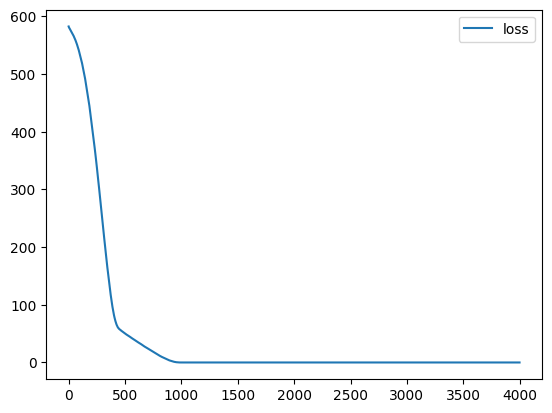

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
ai_brain = Sequential([
    Dense(6,activation = 'relu'),
    Dense(6,activation = 'relu'),
    Dense(1)
])
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')
ai_brain.fit(X_train1,y_train,epochs = 4000)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:

X_test1 = Scaler.transform(X_test)
ai_brain.evaluate(X_test1,y_test)


2/2 [==============================] - 0s 5ms/step - loss: 0.0015


0.0015169888501986861

In [ ]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 41ms/step


array([[11.972867]], dtype=float32)